<a href="https://colab.research.google.com/github/couragedike1/Times-Decomposition-Analysis/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [2]:
# STEP 2: Load Dataset
# AirPassengers dataset (monthly airline passengers: 1949-1960)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

ts = df['Passengers']


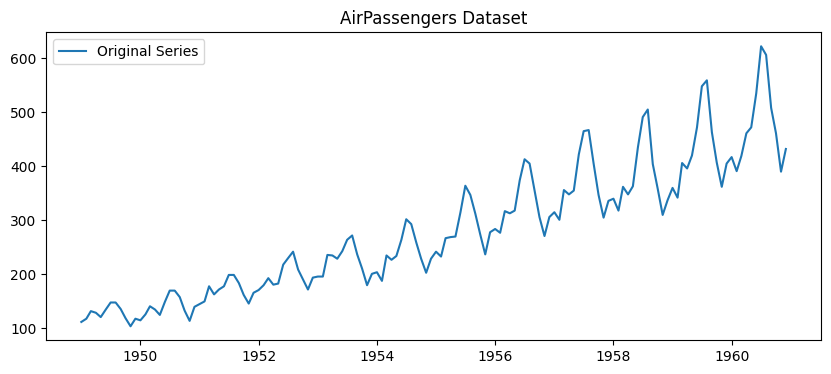

In [3]:
# STEP 3: Plot original series
plt.figure(figsize=(10,4))
plt.plot(ts, label="Original Series")
plt.title("AirPassengers Dataset")
plt.legend()
plt.show()

In [4]:
# STEP 4: Check stationarity using ADF
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


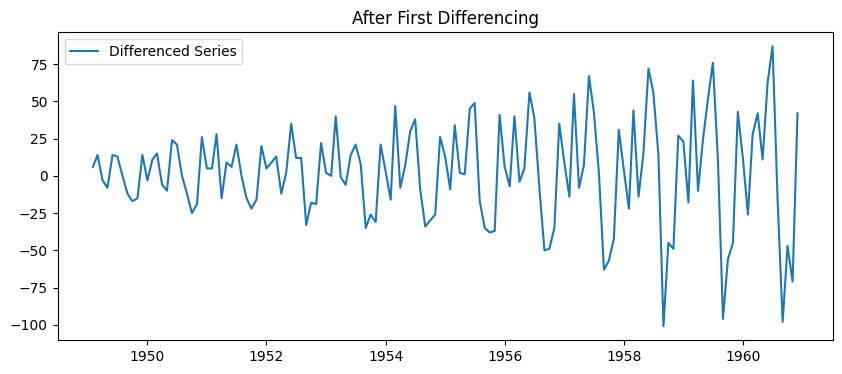

In [5]:
# STEP 5: Differencing to achieve stationarity
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff, label="Differenced Series")
plt.title("After First Differencing")
plt.legend()
plt.show()

In [6]:
# Re-check ADF
adf_result_diff = adfuller(ts_diff)
print("\nAfter Differencing:")
print("ADF Statistic:", adf_result_diff[0])
print("p-value:", adf_result_diff[1])


After Differencing:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [8]:
# STEP 6: Fit ARIMA model (p,d,q) = (1,1,1) as example
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 20 Aug 2025   AIC                           1394.683
Time:                        16:44:21   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
# STEP 7: Forecast
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months

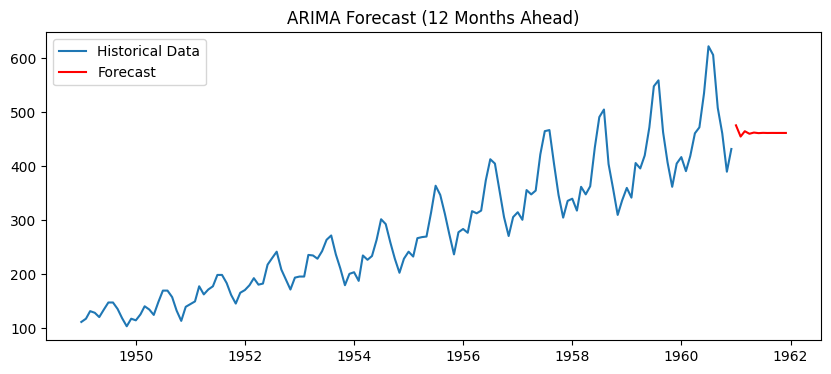

In [14]:
# Plot forecast
plt.figure(figsize=(10,4))
plt.plot(ts, label="Historical Data")
plt.plot(forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast (12 Months Ahead)")
plt.legend()
plt.show()